# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


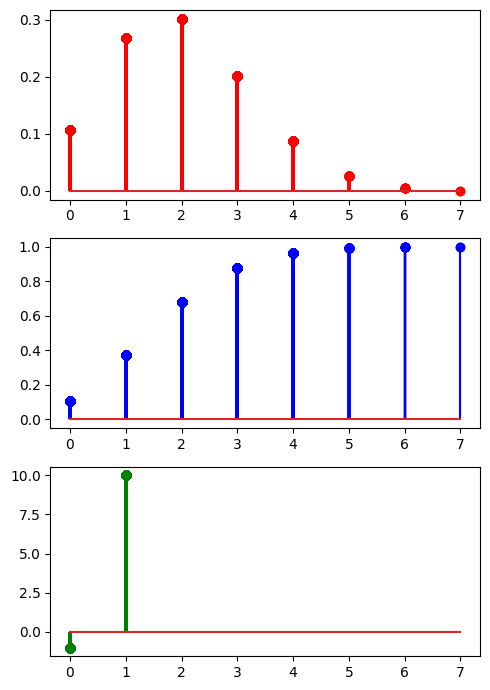

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [3]:
# Distribucion Normal
from scipy.stats import norm
import numpy as np

def dnorm(x, mean=0, sd=1):
    
    result = norm.pdf(x, loc=mean, scale=sd)
    return result

def pnorm(q, mean=0, sd=1):
    
    result = norm.cdf(q, loc=mean, scale=sd)
    return result

def qnorm(p, mean=0, sd=1):
    
    result = norm.ppf(p, loc=mean, scale=sd)
    return result

def rnorm(n, mean=0, sd=1):
    
    result = norm.rvs(loc=mean, scale=sd, size=n)
    return result

np.random.seed(42)

# Distribución Normal con media 0 y desviación estándar 1
print(f"Probability that a Normal(0, 1) takes the value 2: {dnorm(2, mean=0, sd=1)}")
print(f"Probability that a Normal(0, 1) will take a value less than 2: {pnorm(2, mean=0, sd=1)}")
print(f"Which value of a Normal(0, 1) has a cumulative probability of 0.9: {qnorm(0.9, mean=0, sd=1)}")
print(f"Generate 2000 random values from a Normal(0, 1) distribution: {rnorm(2000, mean=0, sd=1)}")

Probability that a Normal(0, 1) takes the value 2: 0.05399096651318806
Probability that a Normal(0, 1) will take a value less than 2: 0.9772498680518208
Which value of a Normal(0, 1) has a cumulative probability of 0.9: 1.2815515655446004
Generate 2000 random values from a Normal(0, 1) distribution: [ 0.49671415 -0.1382643   0.64768854 ... -0.88187465 -0.16306696
 -0.74490264]


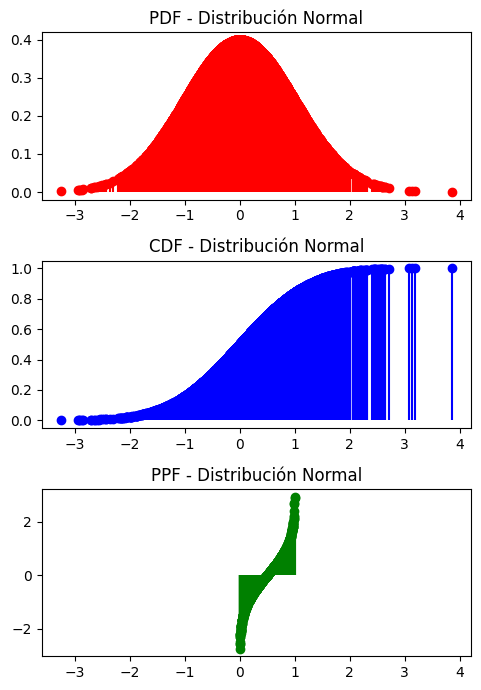

In [6]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

mean = 0
sd = 1
data_norm = rnorm(2000, mean=mean, sd=sd)

pmf_norm = dnorm(data_norm, mean=mean, sd=sd)
cdf_norm = pnorm(data_norm, mean=mean, sd=sd)
ppf_norm = qnorm(data_norm, mean=mean, sd=sd)

fig, axis = plt.subplots(3, 1, figsize=(5, 7))

axis[0].stem(data_norm, pmf_norm, "r-", basefmt=" ")
axis[0].set_title('PDF - Distribución Normal')
axis[1].stem(data_norm, cdf_norm, "b-", basefmt=" ")
axis[1].set_title('CDF - Distribución Normal')
axis[2].stem(data_norm, ppf_norm, "g-", basefmt=" ")
axis[2].set_title('PPF - Distribución Normal')

plt.tight_layout()
plt.show()

In [4]:
# Distribucion Uniforme
from scipy.stats import uniform
import numpy as np

def dunif(x, lower=0, upper=1):
   
    result = uniform.pdf(x, loc=lower, scale=upper-lower)
    return result

def punif(q, lower=0, upper=1):
    
    result = uniform.cdf(q, loc=lower, scale=upper-lower)
    return result

def qunif(p, lower=0, upper=1):
    
    result = uniform.ppf(p, loc=lower, scale=upper-lower)
    return result

def runif(n, lower=0, upper=1):
    
    result = uniform.rvs(loc=lower, scale=upper-lower, size=n)
    return result

# Distribución Uniforme en el intervalo [0, 1]
print(f"Probability that a Uniform(0, 1) takes the value 0.5: {dunif(0.5, lower=0, upper=1)}")
print(f"Probability that a Uniform(0, 1) will take a value less than 0.5: {punif(0.5, lower=0, upper=1)}")
print(f"Which value of a Uniform(0, 1) has a cumulative probability of 0.9: {qunif(0.9, lower=0, upper=1)}")
print(f"Generate 2000 random values from a Uniform(0, 1) distribution: {runif(2000, lower=0, upper=1)}")

Probability that a Uniform(0, 1) takes the value 0.5: 1.0
Probability that a Uniform(0, 1) will take a value less than 0.5: 0.5
Which value of a Uniform(0, 1) has a cumulative probability of 0.9: 0.9
Generate 2000 random values from a Uniform(0, 1) distribution: [0.40710649 0.06600984 0.34882053 ... 0.81186612 0.01386214 0.64937882]


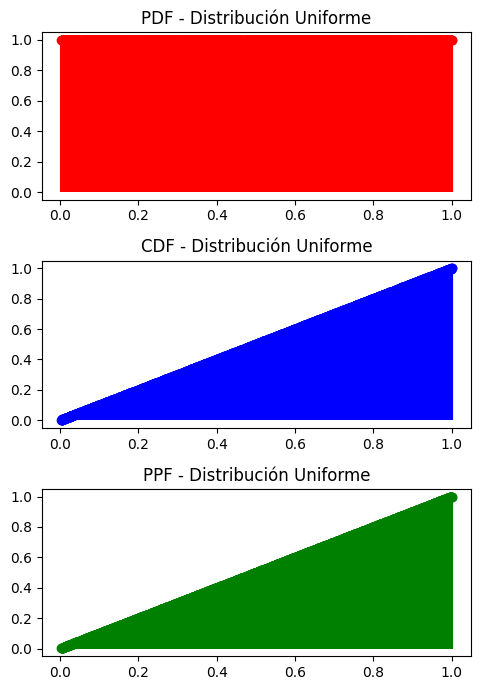

In [7]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

lower = 0
upper = 1
data_unif = runif(2000, lower=lower, upper=upper)

pmf_unif = dunif(data_unif, lower=lower, upper=upper)
cdf_unif = punif(data_unif, lower=lower, upper=upper)
ppf_unif = qunif(data_unif, lower=lower, upper=upper)

fig, axis = plt.subplots(3, 1, figsize=(5, 7))

axis[0].stem(data_unif, pmf_unif, "r-", basefmt=" ")
axis[0].set_title('PDF - Distribución Uniforme')
axis[1].stem(data_unif, cdf_unif, "b-", basefmt=" ")
axis[1].set_title('CDF - Distribución Uniforme')
axis[2].stem(data_unif, ppf_unif, "g-", basefmt=" ")
axis[2].set_title('PPF - Distribución Uniforme')

plt.tight_layout()
plt.show()